In [3]:
import spacy

/home/csgrad/akumar58/anaconda3/envs/incon/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# !python -m spacy download en_core_web_lg

In [97]:
nlp = spacy.load("en_core_web_lg")
nlp.add_pipe("merge_entities")

In [4]:
doc = nlp("Donad Trump was President of USA")

In [5]:
doc

Donad Trump was President of USA

In [6]:
doc.ents

(Donad Trump, USA)

In [155]:
from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)

In [5]:
info_dir = '~/inconsistency_dataset/inconsistency/mma_infographics/info.json'

In [98]:
import pandas as pd

data = pd.read_json(info_dir)
title_df = pd.DataFrame(data).T

In [99]:
only_title = title_df["title"]

In [ ]:
#finding entity groups in titles

text_entities = []
for i in range(len(only_title)):
    doc = nlp(only_title.iloc[i])
    for ent in doc.ents:
        if ent.label_ not in text_entities:
            text_entities.append(ent.label_)
        print(ent.text, ent.start_char, ent.end_char, ent.label_)

    # print([t.text if not t.ent_type_ else t.ent_type_ for t in doc])
    # print(" ".join([t.text if not t.ent_type_ else t.ent_type_ for t in doc]) )
d = {}
for en in text_entities:
    d[en] = spacy.explain(en)

In [103]:
import json
json = json.dumps(d)
f = open("title_entities.json","w")
f.write(json)
f.close()

In [104]:
for k,v in d.items():
    print(k,"-----> ",v)

LOC ----->  Non-GPE locations, mountain ranges, bodies of water
NORP ----->  Nationalities or religious or political groups
ORG ----->  Companies, agencies, institutions, etc.
WORK_OF_ART ----->  Titles of books, songs, etc.
DATE ----->  Absolute or relative dates or periods
GPE ----->  Countries, cities, states
PERSON ----->  People, including fictional
EVENT ----->  Named hurricanes, battles, wars, sports events, etc.
CARDINAL ----->  Numerals that do not fall under another type
MONEY ----->  Monetary values, including unit
PRODUCT ----->  Objects, vehicles, foods, etc. (not services)
PERCENT ----->  Percentage, including "%"
FAC ----->  Buildings, airports, highways, bridges, etc.
LAW ----->  Named documents made into laws.
LANGUAGE ----->  Any named language
ORDINAL ----->  "first", "second", etc.
TIME ----->  Times smaller than a day
QUANTITY ----->  Measurements, as of weight or distance


In [142]:
#compile entity list for each label from the titles

pre_entites = {}

for i in range(len(only_title)):
    doc = nlp(only_title.iloc[i])
    for ent in doc.ents:
        print(ent.text, ent.start_char, ent.end_char, ent.label_)
        if ent.label_ not in pre_entites:
            pre_entites[ent.label_] = [ent.text]
        else:
            if ent.text not in pre_entites[ent.label_]:
                if len(ent.text) > 1: 
                    pre_entites[ent.label_].append(ent.text)

Europe 0 6 LOC
Iranians 5 13 NORP
Google 0 6 ORG
Break Through 25 38 WORK_OF_ART
2022 46 50 DATE
U.S. 0 4 GPE
Polls 36 41 ORG
America 0 7 GPE
Top Online Fashion Shops 10 34 ORG
James Bond 0 10 PERSON
The Strength of Hurricanes 0 26 ORG
U.S. 50 54 GPE
The Growing Global Reliance on Antidepressants 0 46 ORG
Tesla 0 5 ORG
COVID-19 0 8 ORG
Europe 33 39 LOC
World Cup 0 9 EVENT
Qatar 13 18 GPE
World 4 9 ORG
The Hurricane Risk 0 18 EVENT
Latin America 22 35 LOC
Caribbean 44 53 LOC
Europe 0 6 LOC
Sputnik 5 12 ORG
Instagram 32 41 ORG
U.S. 4 8 GPE
The Premier League's 0 20 ORG
Youngest 21 29 LOC
World 4 9 ORG
Africa 0 6 LOC
Queen Elizabeth 0 15 PERSON
2008 44 48 DATE
COVID-19 0 8 ORG
Federer 0 7 ORG
Federer 0 7 ORG
Beauty Tech 0 11 ORG
Sight 20 25 ORG
India 0 5 GPE
UK 16 18 GPE
Europe 29 35 LOC
Azerbaijan 21 31 GPE
U.S. 43 47 GPE
Americans 0 9 NORP
August 43 49 DATE
World 4 9 ORG
The Global Mobile Payment Landscape 0 35 ORG
Dobbs Decision Sets Off Wave of Female Voter 0 44 ORG
New York City Ride

In [ ]:
pre_entites

In [150]:
# df = pd.DataFrame.from_dict(pre_entites, orient='index').T

In [159]:
with open("pre_entities.txt", "w") as outfile:
    outfile.write(str(pre_entites))

In [162]:
import pickle

with open("pre_entities.pickle", "wb") as outfile:
    pickle.dump(str(pre_entites), outfile )

In [ ]:
a_file = open("pre_entities.pkl", "wb")
pickle.dump(pre_entites, a_file)
a_file.close()

a_file = open("pre_entities.pkl", "rb")
output = pickle.load(a_file)
print(output)

In [174]:
type(pre_entites['LOC'])


list

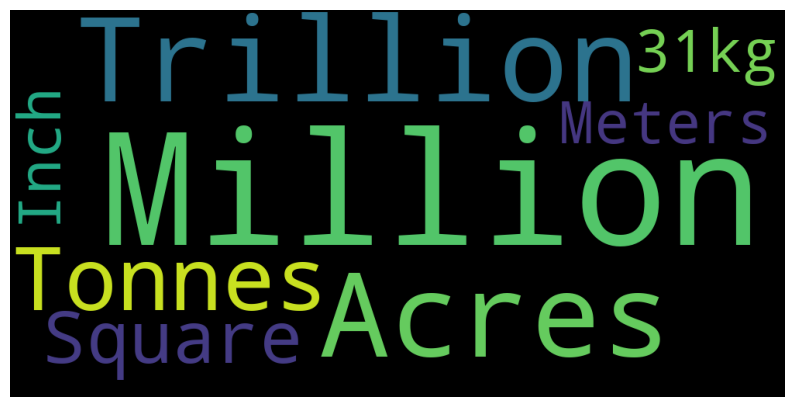

In [198]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

my_list = pre_entites['QUANTITY']
unique_string=(" ").join(my_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("QUANTITY_WMAP"+".png", bbox_inches='tight')
plt.show()
plt.close()

/home/csgrad/akumar58/anaconda3/envs/incon/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import collections
import spacy
import pandas as pd
import pickle
import random
import numpy as np

nlp = spacy.load("en_core_web_lg")
nlp.add_pipe("merge_entities")

info_dir = '~/inconsistency_dataset/inconsistency/mma_infographics/info.json'

entity_file = open("pre_entities.pkl", "rb")
pre_entites = pickle.load(entity_file)

input_data = pd.read_json(info_dir)
info_df = pd.DataFrame(input_data).T

data = info_df[["title","graphic"]]
ner_replaced = pd.DataFrame()
new_titles = []
image = []
attr_type = []
manipulations = collections.defaultdict(dict)

for i in range(len(data)):
    text = []
    a_ents = set()
    doc = nlp(data.title.iloc[i])
    filename = str(data.graphic.iloc[i][11:-5])
    manipulations[filename] = {}
    for term in doc:
        if term.ent_type_:
            a_ents.add(str(term.ent_type_))
            entities = pre_entites[term.ent_type_]
            random_entity = random.choice(entities)
            while random_entity == term.text:
                random_entity = random.choice(entities)
            text.append(random_entity.strip())
            manipulations[filename][str(term.text)] = str(random_entity)
        else:
            text.append(term.text.strip())
    replaced = " ".join(text)
    new_titles.append(replaced)
    image.append(data.graphic.iloc[i])
    if not a_ents:
        attr_type.append([""])
    else:
        attr_type.append(list(a_ents))

temp = pd.DataFrame()
temp = info_df
temp["manipulated_title"] = new_titles
temp["ATTR"] = attr_type
temp["index"] = np.array(temp["graphic"].str[11:-5])
temp = temp[['index','title','manipulated_title','body','graphic','publishedDate','tag',"ATTR"]]

a_file = open("ner_manipulation_info.pkl", "wb")
pickle.dump(manipulations, a_file)
a_file.close()

temp.to_json('ner_manipution.json', orient='records')



In [14]:
temp

In [ ]:
manipulations

In [ ]:
# a_file = open("ner_manipulation_info.pkl", "rb")
# output = pickle.load(a_file)
# print(output)